## Insurance Forecast using Regression models

### Different regression models that we will consider:
- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression

In [1]:
# importing libraries

import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

In [2]:
# importing the dataset
df = pd.read_csv('insurance.csv')

# viewing top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Overviewing Columns:

- age: age of primary beneficiary
- sex:  gender..female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to   height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: number of children covered by health insurance / number of dependents
- smoker: smoking
- region: the beneficiary's residential area.
- charges: individual medical costs billed by health insurance.

## Data Cleaning and Feature Engineering

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no NAN in the data

In [4]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# encoding
Male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, Male], axis=1 )

smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, smoker], axis=1 )

region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis=1 )

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


## Data Visualization

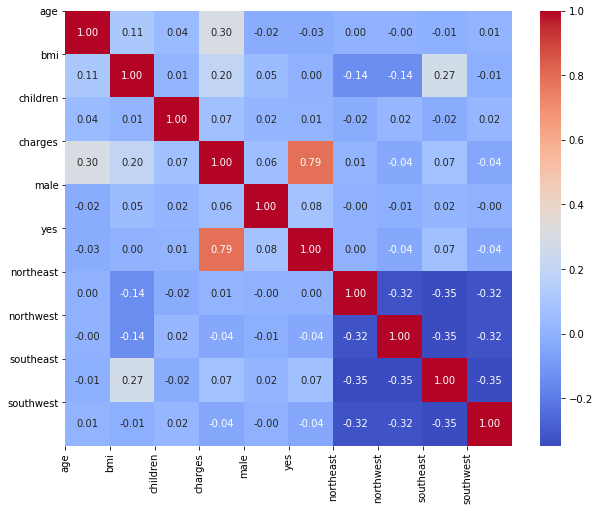

In [8]:
corr = df.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


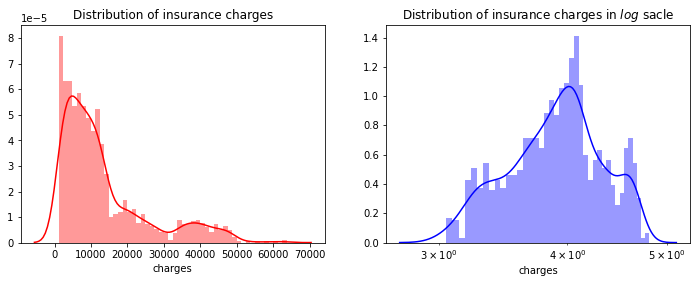

In [9]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

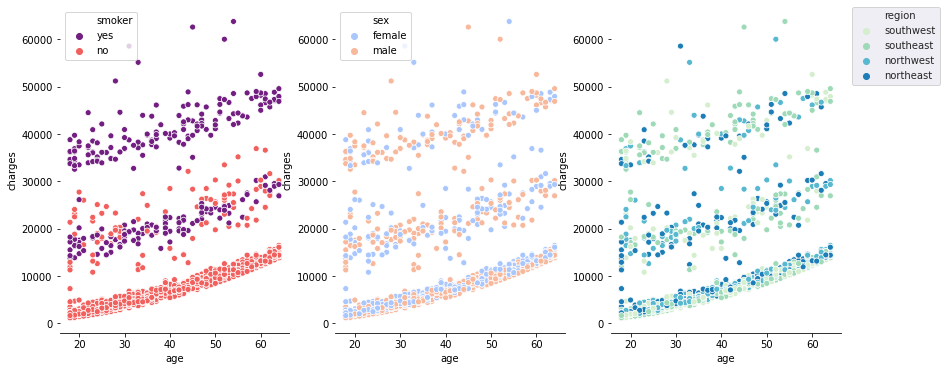

In [10]:
fig, ax =plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
sns.scatterplot(x='age', y='charges', data=df, palette='magma',hue='smoker',ax=ax[0])
sns.scatterplot(x='age', y='charges', data=df, palette='coolwarm',hue='sex',ax=ax[1])
sns.scatterplot(x='age', y='charges', data=df, palette='GnBu',hue='region',ax=ax[2])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)

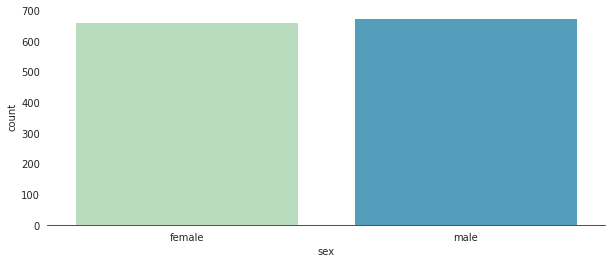

In [11]:
plt.figure(figsize=(10,4))
sns.set_style('white')
sns.countplot(x='sex', data = df, palette='GnBu')
sns.despine(left=True)


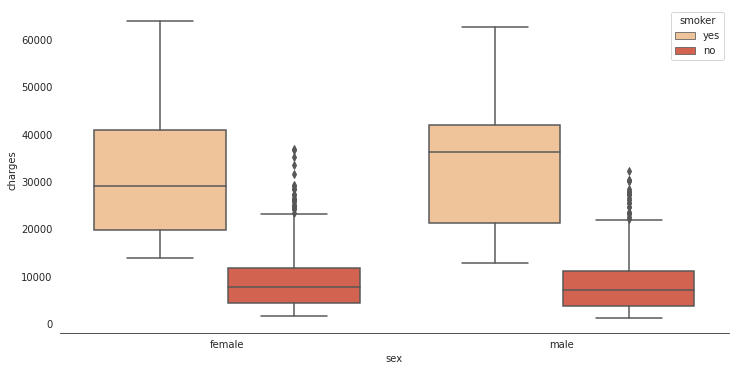

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x='sex', y='charges', data = df, palette='OrRd', hue='smoker')
sns.despine(left=True)

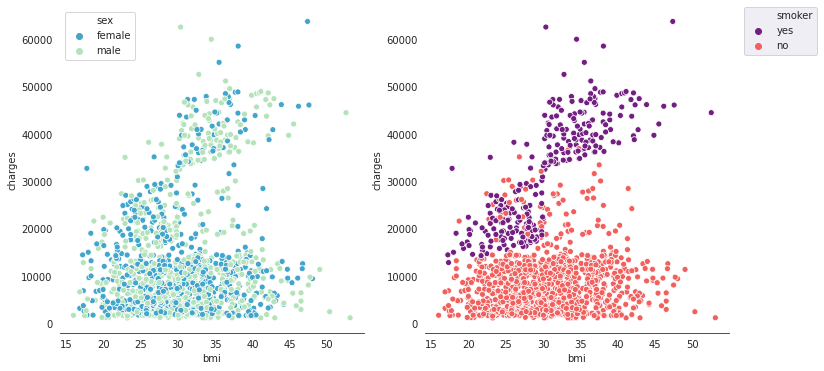

In [13]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (12,6))
sns.scatterplot(x='bmi', y='charges', data = df, palette='GnBu_r', hue='sex', ax=ax[0])
sns.scatterplot(x='bmi', y='charges', data = df, palette='magma', hue='smoker', ax=ax[1])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Box plot of charges vs children')

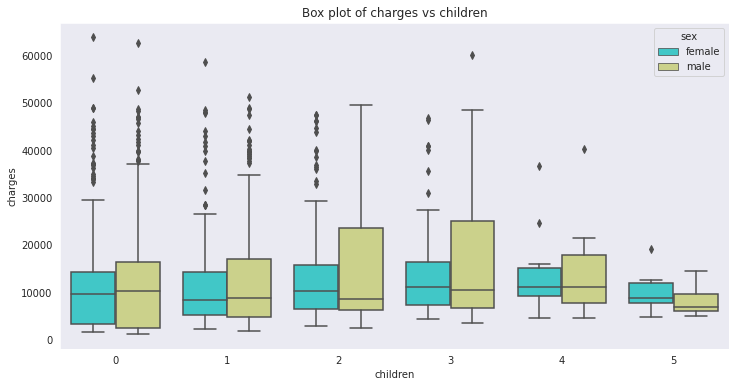

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

Text(0.5, 1.0, 'Violin plot of charges vs children')

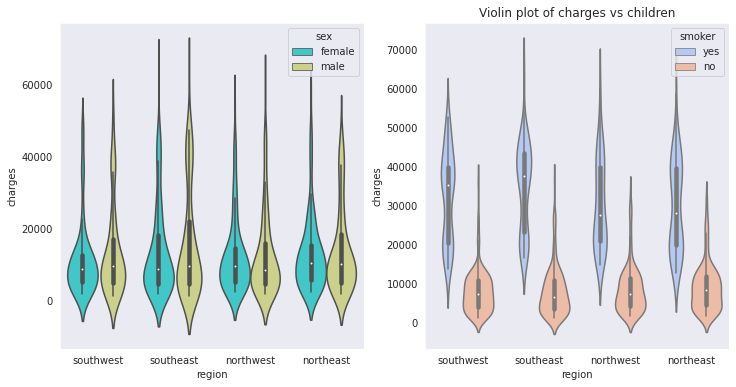

In [15]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (12,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',ax=ax[0])
sns.violinplot(x='region', y='charges',hue='smoker',data=df,palette='coolwarm',ax=ax[1])
plt.title('Violin plot of charges vs children')

## Linear Regression

In [16]:
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [17]:
X=df.drop('charges', axis=1)  # independent variable
y=df['charges'] # dependent variable

In [18]:
# splitting the dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1070, 9)
Shape of X_test:  (268, 9)
Shape of y_train:  (1070,)
Shape of y_test (268,)


In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Predicting Cross Validation Score of the Test set
cv_linear = cross_val_score(estimator = lr, X = X, y = y, cv = 10)

# Predicting R2 Score of the Train set 
y_pred_linear_train = lr.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score of the Test set 
y_pred_linear_test = lr.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting MAE and RMSE of the Test set 
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
mae_linear = mean_absolute_error(y_test, y_pred_linear_test)

# printing the results
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("MAE: ", mae_linear)
print("RMSE: ", rmse_linear)


CV:  0.7445006998667606
R2_score (train):  0.7386399322587835
R2_score (test):  0.7961638625563372
MAE:  3882.3147477718426
RMSE:  5576.858371891542


## Polynomial Regression

In [22]:
# creating the polynomial features and the regressor model
from sklearn.preprocessing import PolynomialFeatures

ply_reg = PolynomialFeatures(degree = 2)
X_ply = ply_reg.fit_transform(X)

X_train_ply = ply_reg.fit_transform(X_train)
ply_reg.fit(X_train_ply, y_train)

regressor_ply = LinearRegression()
regressor_ply.fit(X_train_ply, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Predicting Cross Validation Score of the Test set
cv_ply = cross_val_score(estimator = regressor_ply, X = X_ply, y = y, cv = 10)

# Predicting R2 Score of the Train set
y_pred_ply_train = regressor_ply.predict(ply_reg.fit_transform(X_train))
r2_score_ply_train = r2_score(y_train, y_pred_ply_train)

# Predicting R2 Score of the Test set
y_pred_ply_test = regressor_ply.predict(ply_reg.fit_transform(X_test))
r2_score_ply_test = r2_score(y_test, y_pred_ply_test)

# Predicting MAE and RMSE of the Test set
rmse_ply = (np.sqrt(mean_squared_error(y_test, y_pred_ply_test)))
mae_ply = mean_absolute_error(y_test, y_pred_ply_test)

# printing the results
print('CV: ', cv_ply.mean())
print('R2_score (train): ', r2_score_ply_train)
print('R2_score (test): ', r2_score_ply_test)
print("MAE:", mae_ply)
print("RMSE: ", rmse_ply)


CV:  0.8035147456704845
R2_score (train):  0.6331194606937816
R2_score (test):  0.679876742219446
MAE: 5510.910583731343
RMSE:  6988.880887707908


## Ridge Regression

In [24]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import Ridge  # for ridege regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [25]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV  # for hypertuning

parameters =  {  'model__alpha' : [43],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42] 
}

regressor_ridge = GridSearchCV(ridge_pipe, parameters, iid=False, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

/home/asus/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [26]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.8363491525351027
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [27]:
# Predicting Cross Validation Score of the Test set
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score of the Train set 
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score of the Test set
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting MAE and RMSE of the Test set
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)

# printing the results
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print('MAE:', mae_ridge)
print("RMSE: ", rmse_ridge)



CV:  0.8363491525351027
R2_score (train):  0.838126431683748
R2_score (test):  0.8828739372707374
MAE: 2562.6507601832914
RMSE:  4227.423887203277


## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso  # for lasso regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [29]:

parameters =  {  'model__alpha' : [0.9949],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__max_iter' : [5000],
                'model__random_state': [42] 
}
regressor_lasso = GridSearchCV(lasso_pipe, parameters, iid=False, cv=10, n_jobs = -1, verbose = 4)
regressor_lasso = regressor_lasso.fit(X, y.ravel())

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    1.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
/home/asus/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [30]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_

# Predicting R2 Score of the Train set
y_pred_lasso_train = regressor_lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score of the Test set
y_pred_lasso_test = regressor_lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting MAE and RMSE pf the Test set
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)

# printing the results
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print('MAE:', mae_lasso)
print("RMSE: ", rmse_lasso)


CV:  0.8362960263032919
R2_score (train):  0.8386272645282101
R2_score (test):  0.8824403430825705
MAE: 2533.6374771291667
RMSE:  4235.2415031760265


##  Support Vector Regression

In [31]:
from sklearn.svm import SVR # for support vector regression

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.values.reshape(-1,1))

In [32]:
# Creating the SVR regressor
svr_reg = SVR()

In [33]:
# Applying Grid Search to find the best model and the best parameters
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

svr_reg = GridSearchCV(estimator = svr_reg,
                           param_grid = parameters,
                           cv = 10,
                           verbose = 4,
                           iid = True,
                           n_jobs = -1)
svr_reg = svr_reg.fit(X_scaled, y_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   16.2s finished
/home/asus/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [34]:
print(svr_reg.best_params_)
print(svr_reg.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.0001}
0.8420262591949923


In [35]:
# Predicting Cross Validation Score
cv_svr = svr_reg.best_score_

# Predicting R2 Score of the Train set
y_pred_svr_train = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score of the Test set
y_pred_svr_test = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting MAE and RMSE of the Test set 
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
mae_svr = mean_absolute_error(y_test, y_pred_svr_test)

# printing the results
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print('MAE:', mae_svr)
print("RMSE: ", rmse_svr)


CV:  0.8420262591949923
R2_score (train):  0.8392895811393368
R2_score (test):  0.8925255954113661
MAE: 2190.5304193367865
RMSE:  4049.501356202733


## Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression

In [37]:
# Creating the Decision Tree regressor
dt_reg = DecisionTreeRegressor(random_state = 42)

In [38]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "max_depth": np.arange(1,21),
              "min_samples_leaf": [1, 5, 10, 20, 50, 100],
              "min_samples_split": np.arange(2, 11),
              "criterion": ["mse"],
              "random_state" : [42]}
            ]

dt_reg = GridSearchCV(estimator = dt_reg,
                           param_grid  = parameters,
                           cv = 10,
                           verbose = 4,
                           iid = False,
                           n_jobs = -1)
dt_reg = dt_reg.fit(X_scaled, y_scaled)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 8680 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:    6.0s finished
/home/asus/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [39]:
print(dt_reg.best_params_)
print(dt_reg.best_score_)

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
0.8524782784394495


In [40]:
# Predicting Cross Validation Score
cv_dt = dt_reg.best_score_

# Predicting R2 Score of the Train set 
y_pred_dt_train = sc_y.inverse_transform(dt_reg.predict(sc_X.transform(X_train)))
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score of the Test set 
y_pred_dt_test = sc_y.inverse_transform(dt_reg.predict(sc_X.transform(X_test)))
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting MAE and RMSE of the Test set
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
mae_dt = mean_absolute_error(y_test, y_pred_dt_test)

# printing the results
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("MAE:", mae_dt)
print("RMSE: ", rmse_dt)


CV:  0.8524782784394495
R2_score (train):  0.8663237076324467
R2_score (test):  0.9206029961856423
MAE: 2127.4345529697553
RMSE:  3480.575683965201


## Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor # for random forest regression

In [42]:
# Creating the Random Forest regressor
rf_reg = RandomForestRegressor()

In [43]:
# Applying GridSearch to find the best model and the best parameters
parameters =  { "n_estimators": [1200],
                "max_features": ["auto"],
                "max_depth": [50],
                "min_samples_split": [7],
                "min_samples_leaf": [10],
                "bootstrap": [True],
                "criterion": ["mse"],
                "random_state" : [42] }
            
rf_reg = GridSearchCV(estimator = rf_reg,
                                  param_grid = parameters,
                                  cv = 10,
                                # verbose = 4,
                                  n_jobs = -1)
rf_reg = rf_reg.fit(X_scaled, y.ravel())

In [44]:
print(rf_reg.best_params_)
print(rf_reg.best_score_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
0.8587778462081067


In [45]:
# Predicting Cross Validation Score
cv_rf = rf_reg.best_score_

# Predicting R2 Score of the Train Set
y_pred_rf_train = rf_reg.predict(sc_X.transform(X_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score of the Test set 
y_pred_rf_test = rf_reg.predict(sc_X.transform(X_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting MAE and RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
mae_rf = mean_absolute_error(y_test, y_pred_rf_test)

# printing the results
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print('MAE:', mae_rf)
print("RMSE: ", rmse_rf)

CV:  0.8587778462081067
R2_score (train):  0.8822581709651309
R2_score (test):  0.9311048145260584
MAE: 1896.0308914467364
RMSE:  3242.227325335115


In [46]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression', rmse_ply, r2_score_ply_train, r2_score_ply_test, cv_ply.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [47]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5576.858372,0.738640,0.796164,0.744501
1,Polynomial Regression,6988.880888,0.633119,0.679877,0.803515
2,Ridge Regression,4227.423887,0.838126,0.882874,0.836349
3,Lasso Regression,4235.241503,0.838627,0.882440,0.836296
4,Support Vector Regression,4049.501356,0.839290,0.892526,0.842026
5,Decision Tree Regression,3480.575684,0.866324,0.920603,0.852478
6,Random Forest Regression,3242.227325,0.882258,0.931105,0.858778


### Visualizing model performance

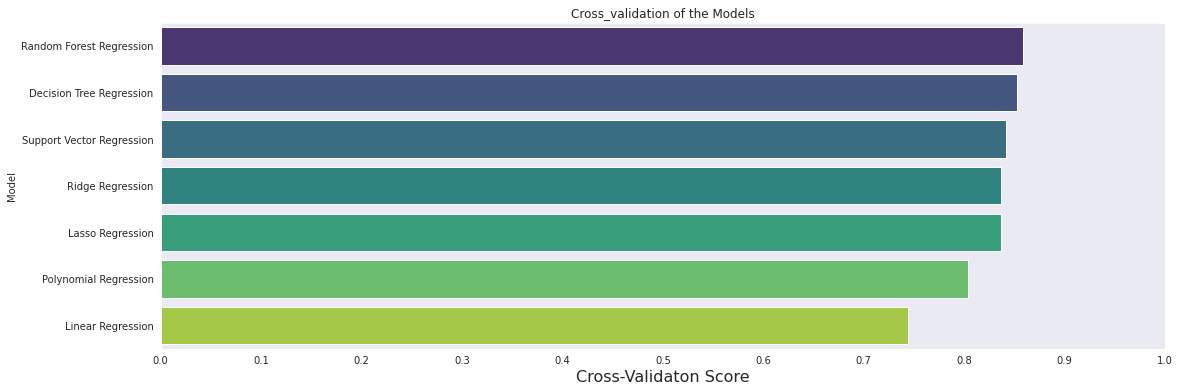

In [48]:
# comaprison of cross-validation between the models

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')

axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.title('Cross_validation of the Models')
plt.show()

Text(0.5, 0, 'Predict')

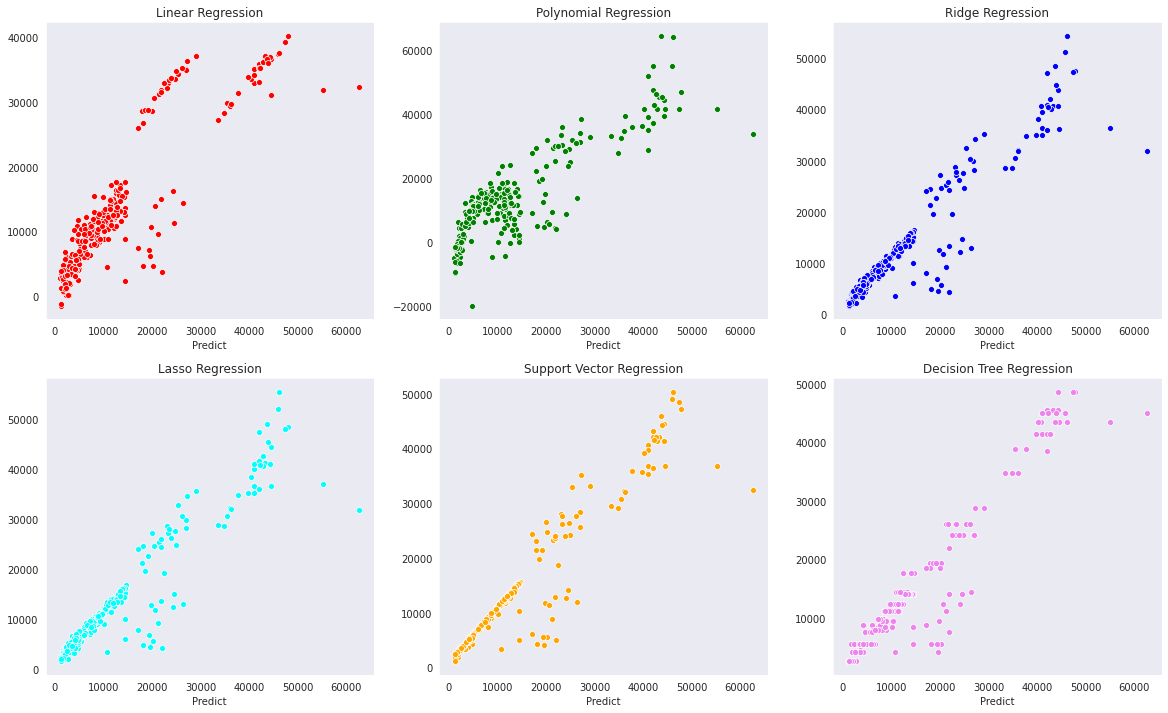

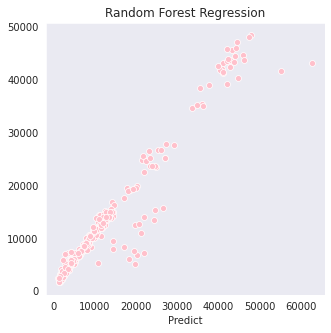

In [49]:
# comparison of R-square between the models
fig, ax = plt.subplots(2,3, figsize=(20,12))
sns.set_style('dark')
g = sns.scatterplot(y_test, y_pred_linear_test, ax=ax[0,0], color='red')
g.set_title('Linear Regression')
g.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ply_test, ax=ax[0,1], color='green')
h.set_title('Polynomial Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ridge_test, ax=ax[0,2], color='blue')
h.set_title('Ridge Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_lasso_test, ax=ax[1,0], color='cyan')
h.set_title('Lasso Regression')
h.set_xlabel('Predict')

sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_svr_test, ax=ax[1,1], color='orange')
h.set_title('Support Vector Regression')
h.set_xlabel('Predict')

sns.set_style('dark')
f = sns.scatterplot(y_test, y_pred_dt_test, ax=ax[1,2], color='violet')
f.set_title('Decision Tree Regression')
f.set_xlabel('Predict')

plt.figure(figsize=(5,5))
sns.set_style('dark')
f = sns.scatterplot(y_test, y_pred_rf_test, color='pink')
f.set_title('Random Forest Regression')
f.set_xlabel('Predict')

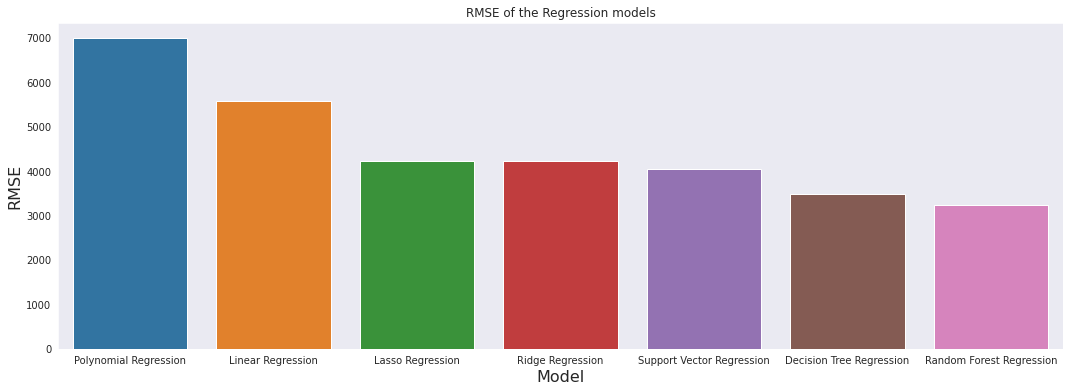

In [50]:
# comparison of RMSE between the models

predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)
plt.title('RMSE of the Regression models')
plt.show()